### Table of Contents
* [1) Pengumpulan Data](#h1)
* [2) Menelaah Data](#h2)
* [3) Validasi Data](#h3)
* [4) Menetukan Object Data](#h4)
* [5) Membersihkan Data](#h5)
* [6) Konstruksi Data](#h6)
* [7) Menentukan label data](#h7)
* [8) Modelling](#h8)
* [9) Evaluasi](#h9)



Dataset **Heart Failure Clinical Records**, yang terdiri dari 299 catatan medis pasien gagal jantung, menyediakan data penting yang mencakup berbagai faktor seperti `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, `ejection_fraction`, `high_blood_pressure`, `platelets`, `serum_creatinine`, `serum_sodium`, `sex`, `smoking`, `time`, `death_event`. Informasi ini menjadi fondasi untuk mengembangkan model prediktif yang akurat.

- **Sumber Data**: [Heart Failure Clinical Records Dataset - UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records)
- **Jumlah Sampel Data**: 299 pasien
- **Jumlah Atribut**: 13 atribut, meliputi: `age`, `anaemia`, `creatinine_phosphokinase`, `diabetes`, dan lainnya.
- **Label**: Kematian pasien selama periode tindak lanjut (0 = hidup, 1 = meninggal).

# Pendekatan Analisis


1. **Menggunakan Dua Fitur Penting**: Model akan dibangun hanya dengan menggunakan dua fitur kunci, yaitu `serum_creatinine` dan `ejection_fraction`. Kedua fitur ini dipilih karena memiliki hubungan signifikan dengan fungsi ginjal dan keseimbangan elektrolit yang berdampak pada kondisi gagal jantung.

2. **Menggunakan Semua Fitur**: Model akan dibangun dengan memanfaatkan semua 13 fitur yang tersedia dalam dataset untuk melihat seberapa besar peningkatan akurasi dan performa jika semua informasi digunakan.

Studi ini berfokus pada dataset 299 pasien yang dikumpulkan pada tahun 2015 untuk mengevaluasi apakah dua faktor klinis utama **serum creatinine** dan **ejection fraction** cukup, untuk memprediksi kelangsungan hidup pasien dengan lebih akurat dibandingkan menggunakan seluruh data fitur klinis.




In [1]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Menampilkan semua kolom dari dataframe saat mencetak dataframe
pd.set_option("display.max_columns", None)

In [2]:
# Menyambungkan google colab dengan google drive untuk memasukkan dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Mengecek file dalam directory
!ls "/content/drive/MyDrive/BK-DS/05_ADS/dataset/heart_failure_clinical_records_dataset_missing_new.csv" # menampilkan daftar file/direktori untuk memastikan file tersedia

/content/drive/MyDrive/BK-DS/05_ADS/dataset/heart_failure_clinical_records_dataset_missing_new.csv


In [4]:
# data_path adalah variabel yang digunakan untuk menyimpan data dengan path yang ada google drive saya
data_path =  '/content/drive/MyDrive/BK-DS/05_ADS/dataset/heart_failure_clinical_records_dataset_missing_new.csv' # menyimpan path file dataset untuk kemudahan akses di kode berikutnya.

In [5]:
# Membaca dan menampilkan dataset
data_df = pd.read_csv(data_path, delimiter=',', header=None) # membaca file  dari path yang telah didefinisikan sebelumnya.
data_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1,2.0,3,4.0,5,6.00,7.0,8,9,10.0,11,12
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,0,61.0,1,38.0,1,155000.00,1.1,143,1,NaN,270,0
296,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139,0,0.0,271,0
297,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138,0,0.0,278,0
298,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140,1,1.0,280,0


## 1. Pengumpulan data


In [6]:
cols =['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','time','death_event']

# Mengganti nama kolom dataframe dengan cols
data_df.columns = cols # Mengganti nama fitur sesuai panduan

In [7]:
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,0.0,1,2.0,3,4.0,5,6.00,7.0,8,9,10.0,11,12
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1


In [8]:
# Menghapus baris pertama (indeks 0)
data_df = data_df.drop(index=0)

# Menampilkan DataFrame setelah baris pertama dihapus
print(data_df.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1  75.0        0                     582.0         0               20.0   
2  55.0        0                    7861.0         0               38.0   
3  65.0        0                     146.0         0               20.0   
4  50.0        1                     111.0         0               20.0   
5  65.0        1                     160.0         1                NaN   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
1                    1  265000.00               1.9           130    1   
2                    0  263358.03               1.1           136    1   
3                    0  162000.00               1.3           129    1   
4                    0  210000.00               1.9           137    1   
5                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
1      0.0     4            1  
2      0.0     6            1  
3      1

In [9]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
5,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,0,61.0,1,38.0,1,155000.00,1.1,143,1,NaN,270,0
296,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139,0,0.0,271,0
297,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138,0,0.0,278,0
298,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140,1,1.0,280,0


## 2. Menelaah data

In [10]:
# Melihat Informasi Dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  284 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         296 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   275 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


In [11]:
# Melihat Deskripsi statistik
data_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,269.000000,299.000000,284.000000,299.000000,296.000000,299.000000,269.000000,299.00000,299.000000,299.000000,275.000000,299.000000,299.00000
mean,61.057004,0.431438,570.947183,0.418060,38.064189,0.351171,261182.344796,1.39388,136.625418,0.648829,0.323636,130.260870,0.32107
std,12.096525,0.496107,973.348989,0.494067,11.778720,0.478136,98953.721912,1.03451,4.412477,0.478136,0.468716,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.000000,4.000000,0.00000
25%,51.000000,0.000000,115.000000,0.000000,30.000000,0.000000,211000.000000,0.90000,134.000000,0.000000,0.000000,73.000000,0.00000
50%,60.000000,0.000000,247.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.000000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.40000,140.000000,1.000000,1.000000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.000000,285.000000,1.00000


In [12]:

data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,269.0,61.057004,12.096525,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,284.0,570.947183,973.348989,23.0,115.0,247.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,296.0,38.064189,11.778720,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,269.0,261182.344796,98953.721912,25100.0,211000.0,262000.0,302000.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [13]:
# Mengidentifikasi jenis kolom (variabel) dalam sebuah dataframe berdasarkan tipe data dan karakteristiknya

def grab_col_names(dataframe, cat_th = 10, car_th = 20): #  memisahkan kolom dalam dataset berdasarkan tipe dan karakteristiknya.

    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]] # kolom kategorikal (tipe "category", "object", "bool", atau numerik dengan unique values < cat_th).
    num_but_cat = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"] and dataframe[col].nunique() < cat_th] # kolom numerik yang bertindak seperti kategorikal (berdasarkan jumlah unique values).
    cat_but_car = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object"] and dataframe[col].nunique() > car_th] # kolom kategorikal dengan unique values > car_th (high cardinality).

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # kolom numerik murni (int64, float64) yang bukan kategorikal.
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Jumlah observasi: {dataframe.shape[0]}")
    print(f"Jumlah variabel: {dataframe.shape[1]}")
    print(f"Kolom kategorikal: {len(cat_cols)}")
    print(f"Kolom Numerik: {len(num_cols)}")
    print(f"Kategori tapi kardinal: {len(cat_but_car)}")
    print(f"Numerik tapi kategorikal: {len(num_but_cat)}")

    # mengembalikan daftar kolom yang dikelompokkan berdasarkan tipe (cat_cols, num_cols, cat_but_car).
    return cat_cols, num_cols, cat_but_car

- Nominal Feature

In [14]:
def plot_categorical(dataframe, categorical_columns):

    # Jumlah kolom kategorikal
    num_cols = len(categorical_columns)
    # Kita membuat 2 subplot (countplot + pie plot) untuk setiap kolom
    fig, axes = plt.subplots(num_cols, 2, figsize=(17, 5 * num_cols))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        # --- Bagian Countplot ---
        sns.countplot(
            x=col,
            data=dataframe,
            ax=axes[2*i],
            hue=col,
            palette="rocket"
        )
        axes[2*i].set_title(f'{col} Count', fontsize=12)
        axes[2*i].set_xlabel(col)
        axes[2*i].set_ylabel('Count')

        # --- Bagian Pie Plot ---
        # Menentukan jumlah kategori unik
        unique_vals = dataframe[col].nunique()
        # Membuat list warna sesuai banyaknya kategori unik
        pie_colors = sns.color_palette("rocket", unique_vals)

        dataframe[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            ax=axes[2*i + 1],
            colors=pie_colors
        )
        axes[2*i+1].set_title(f'{col} Distribution', fontsize=12)
        axes[2*i+1].set_ylabel('')

    plt.tight_layout()
    plt.show()


- Continous features

In [15]:
#Membuat histogram untuk setiap kolom numerik dalam dataframe

def plot_histograms(dataframe, numeric_columns):
    sns.set_theme(style="whitegrid")

    # Hitung jumlah kolom numerik dan tentukan jumlah baris subplot
    num_cols = len(numeric_columns)
    num_rows = (num_cols + 1) // 4 + ((num_cols + 1) % 4 != 0)
    fig, axes = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))
    axes = axes.flatten()


    color = "#3bb4cf"

    for i, col in enumerate(numeric_columns):
        dataframe[col].hist(ax=axes[i], bins=20, color=color)
        axes[i].set_title(col, fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Frequency', fontsize=10)

    # Hapus sumbu yang tidak terpakai jika jumlah kolom tidak habis dibagi 4
    for j in range(num_cols, num_rows * 4):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




In [16]:
# Memanggil fungsi grab_col_names yang telah didefinisikan untuk memisahkan kolom-kolom dalam dataframe menjadi tiga kategori berdasarkan tipe data dan karakteristik distribusinya
cat_cols, num_cols, cat_but_car = grab_col_names(data_df)

Jumlah observasi: 299
Jumlah variabel: 13
Kolom kategorikal: 6
Kolom Numerik: 7
Kategori tapi kardinal: 0
Numerik tapi kategorikal: 6


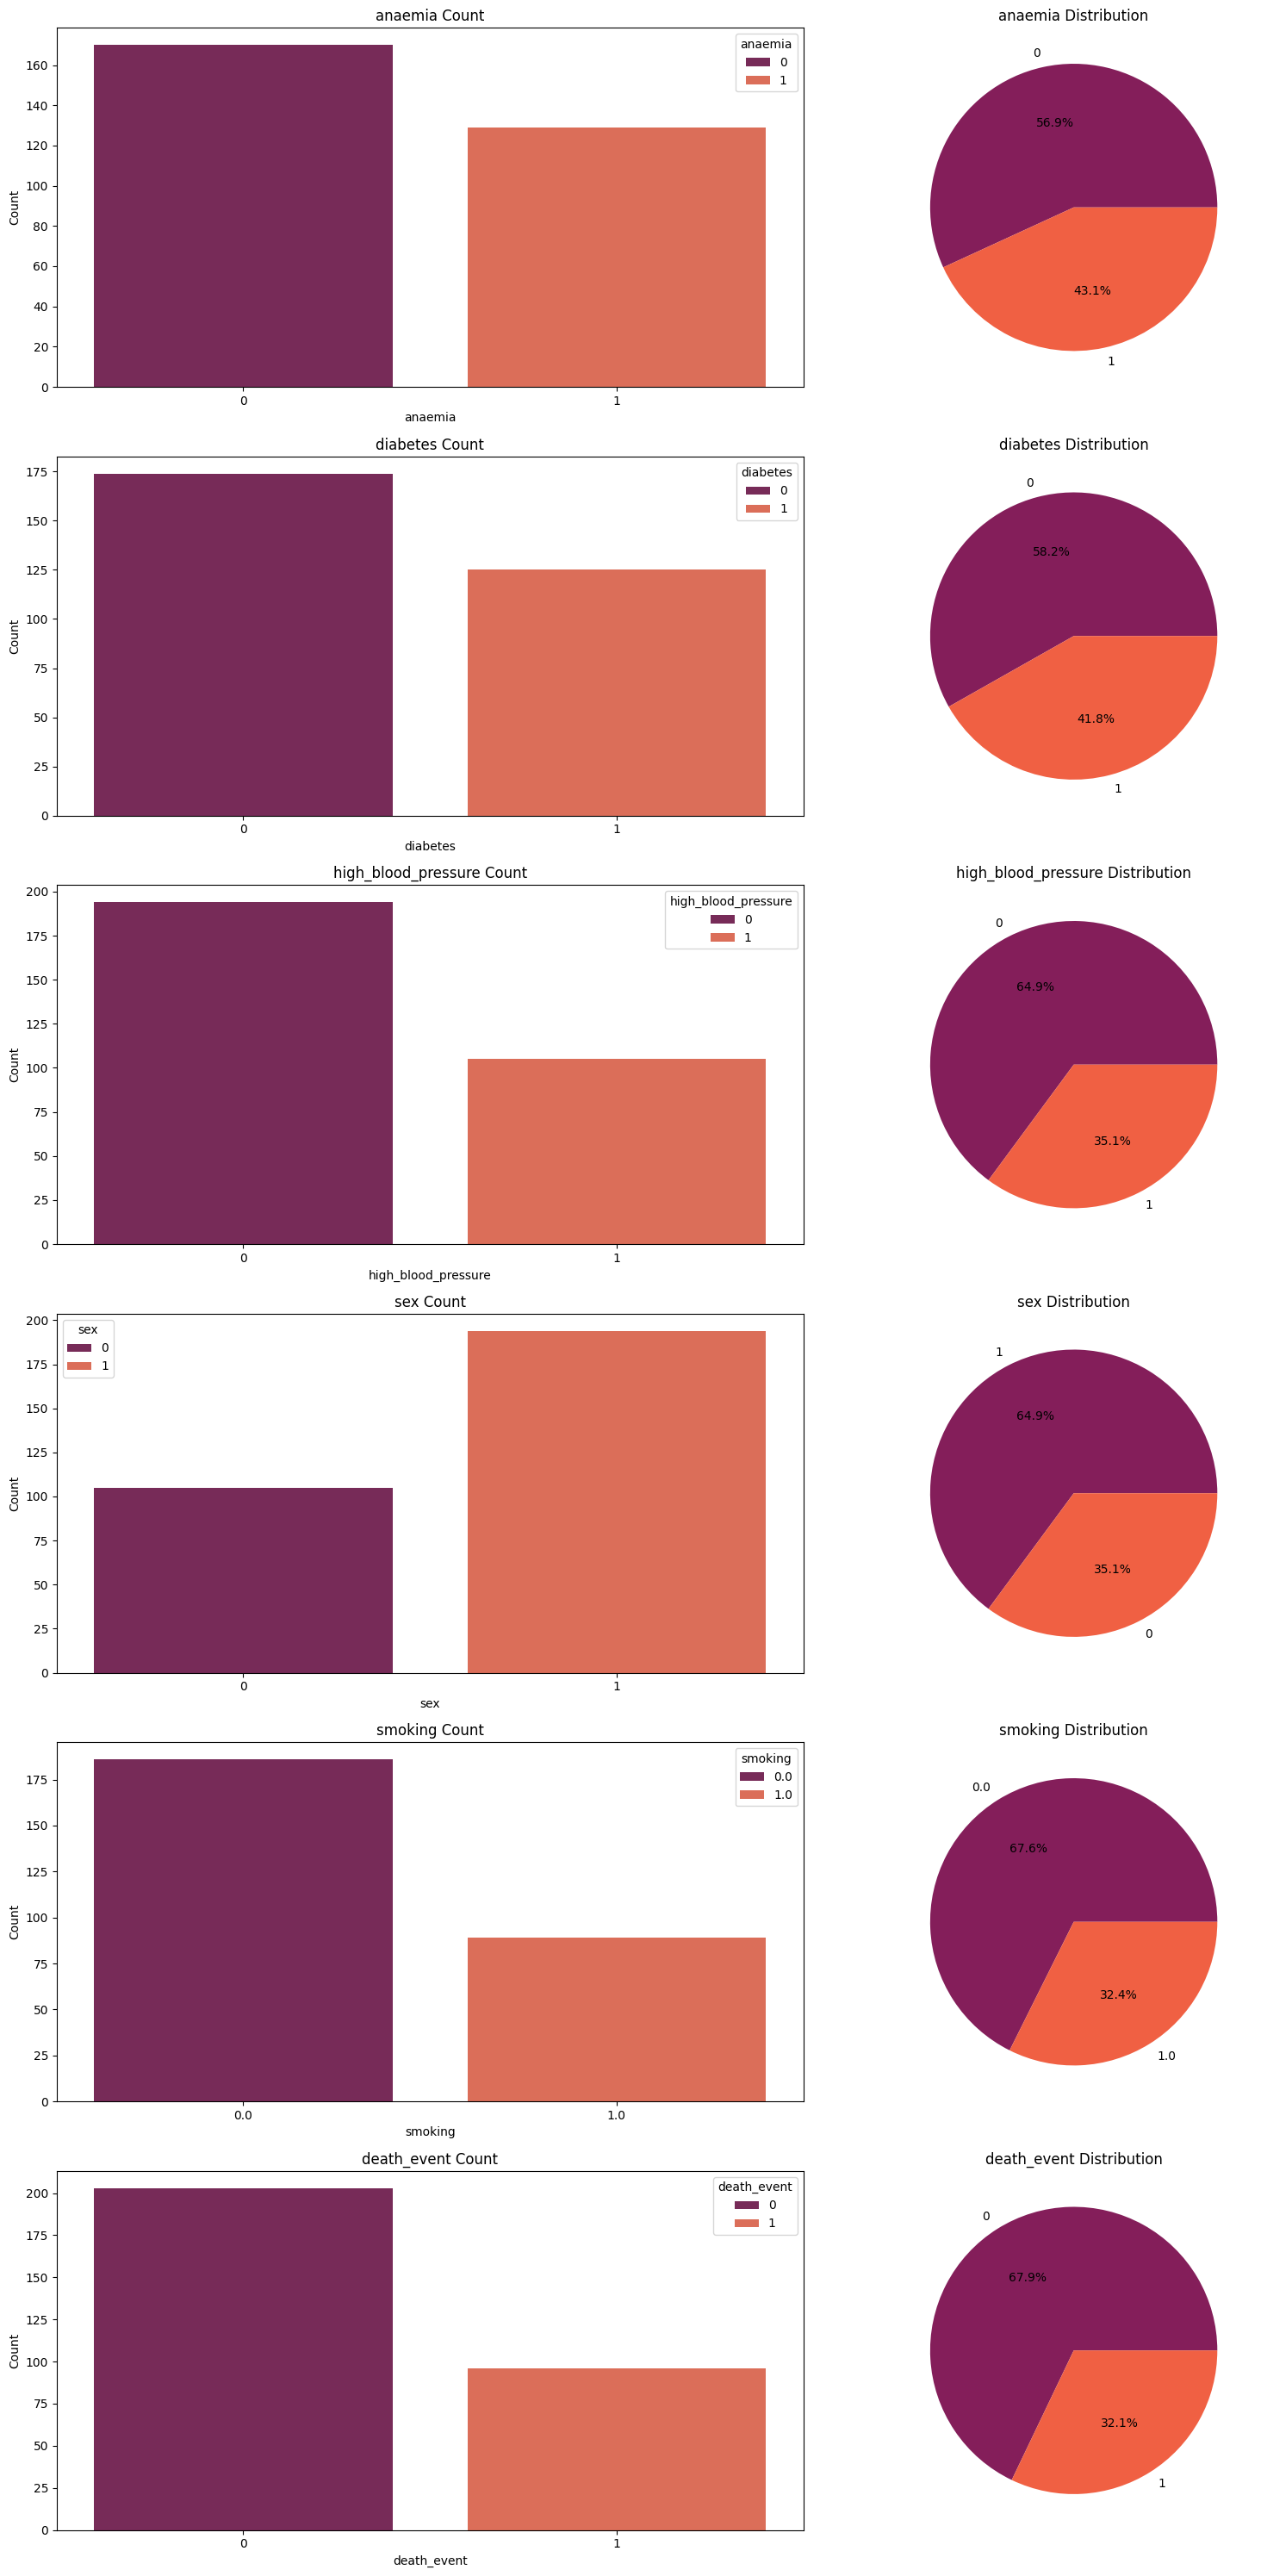

In [17]:
plot_categorical(data_df, cat_cols)

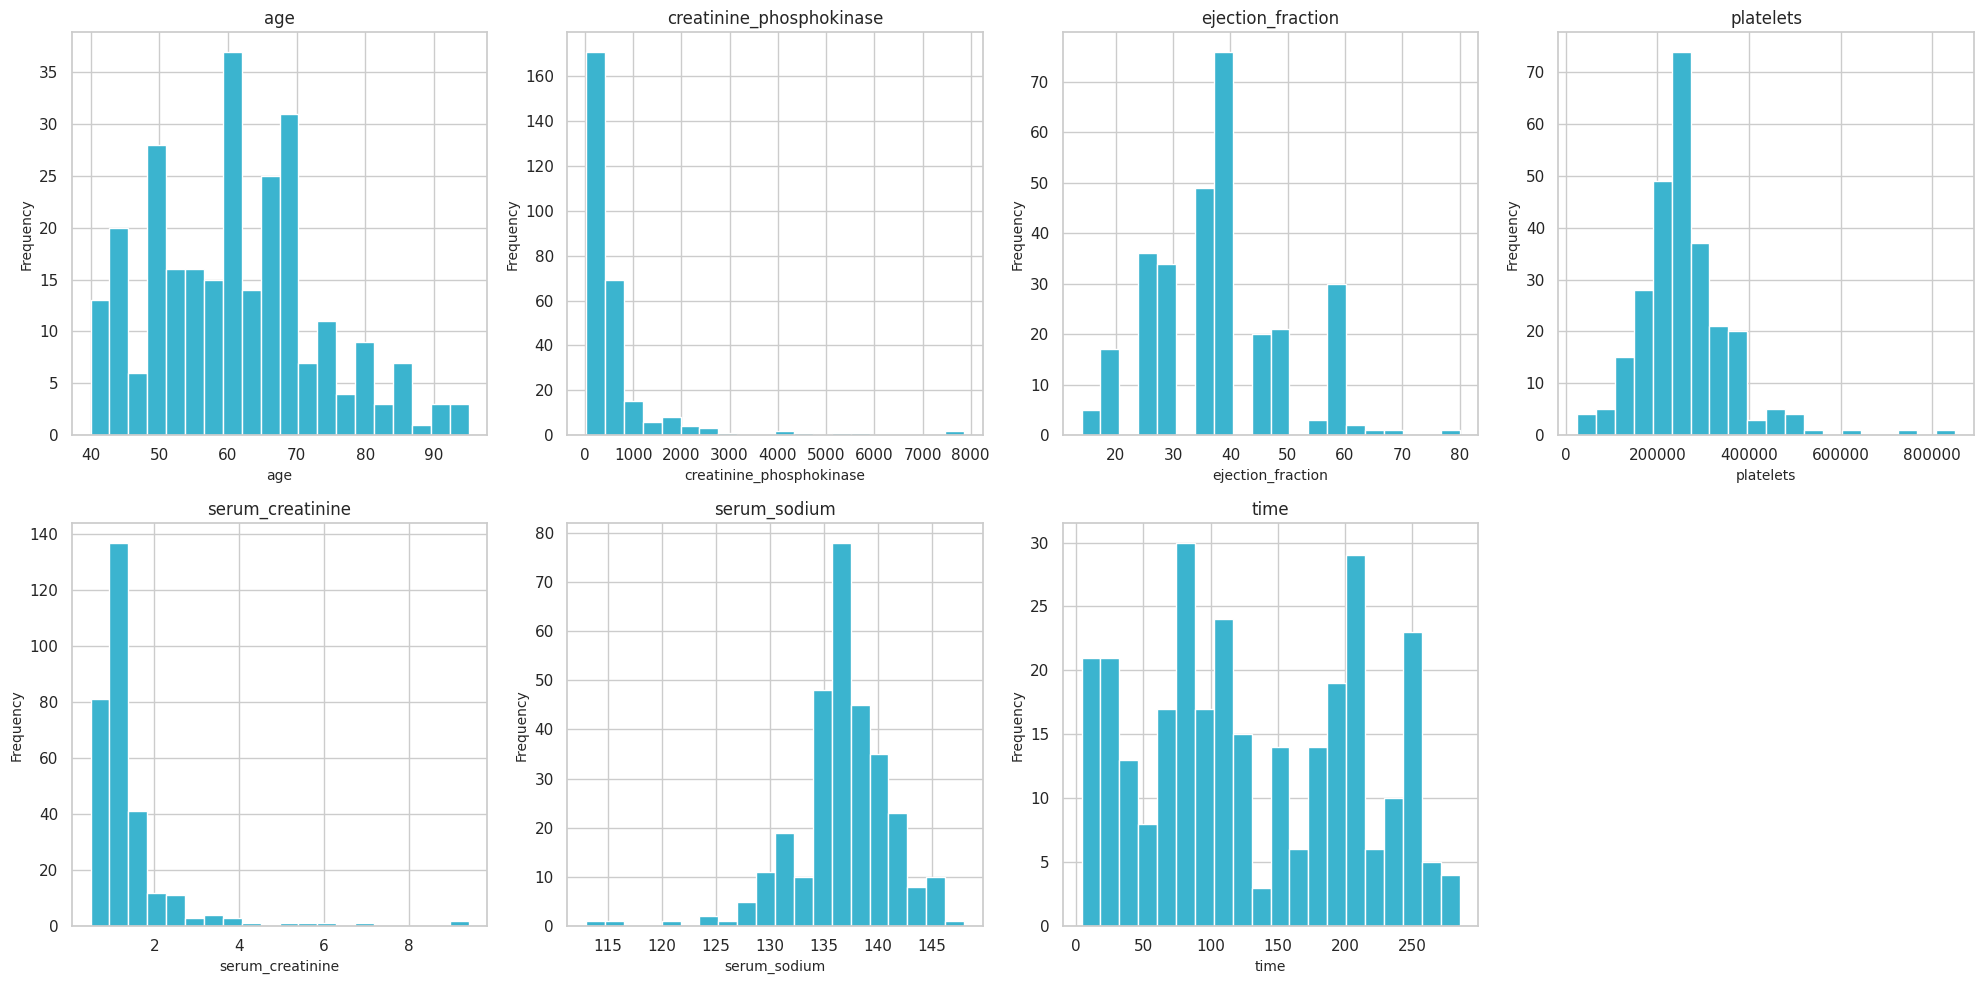

In [18]:
plot_histograms(data_df, num_cols)

## 3. Validasi data

In [19]:
# Melihat Nilai null / missing value
data_df.isnull().sum()

,0
age,30
anaemia,0
creatinine_phosphokinase,15
diabetes,0
ejection_fraction,3
high_blood_pressure,0
platelets,30
serum_creatinine,0
serum_sodium,0
sex,0


In [20]:
data_df.duplicated().sum()

0

In [21]:
# Melihat Data duplikat
# Menampilkan data duplikat
duplicate_rows = data_df.duplicated()
print("All Duplicate Rows:")
data_df[data_df.duplicated(keep=False)]

All Duplicate Rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event


In [22]:
# Melihat Data yang tidak konsisten
# Memeriksa tipe data setiap kolom
print("Tipe data setiap kolom:\n", data_df.dtypes)

# Memeriksa kolom yang bertipe data string padahal seharusnya numerik
wrong_types = data_df.select_dtypes(exclude=['number']).columns
print("Kolom yang bukan numerik padahal seharusnya numerik:\n", wrong_types)


Tipe data setiap kolom:
 age                         float64
anaemia                       int64
creatinine_phosphokinase    float64
diabetes                      int64
ejection_fraction           float64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                     float64
time                          int64
death_event                   int64
dtype: object
Kolom yang bukan numerik padahal seharusnya numerik:
 Index([], dtype='object')


In [23]:
invalid_age = data_df[data_df['age'] < 0]
print("Data dengan umur negatif:\n", invalid_age)

Data dengan umur negatif:
 Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, death_event]
Index: []


In [24]:
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75.0,0,582.0,0,20.0,1,265000.00,1.9,130,1,0.0,4,1
2,55.0,0,7861.0,0,38.0,0,263358.03,1.1,136,1,0.0,6,1
3,65.0,0,146.0,0,20.0,0,162000.00,1.3,129,1,1.0,7,1
4,50.0,1,111.0,0,20.0,0,210000.00,1.9,137,1,0.0,7,1
5,65.0,1,160.0,1,NaN,0,327000.00,2.7,116,0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,NaN,0,61.0,1,38.0,1,155000.00,1.1,143,1,NaN,270,0
296,55.0,0,1820.0,0,38.0,0,270000.00,1.2,139,0,0.0,271,0
297,45.0,0,2060.0,1,60.0,0,742000.00,0.8,138,0,0.0,278,0
298,45.0,0,2413.0,0,38.0,0,140000.00,1.4,140,1,1.0,280,0


In [25]:
# Menampilkan shape DataFrame
print(data_df.shape)


(299, 13)


## 4. Menentukan object data

In [26]:
# Melihat kembali informasi dataset untuk memahami isi dan tipe data

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 1 to 299
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       269 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  284 non-null    float64
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         296 non-null    float64
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 269 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   275 non-null    float64
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 30.5 KB


In [27]:
data_df['death_event'].value_counts()

,count
death_event,
0,203
1,96


## 5. Membersihkan data

In [28]:
data_clean = data_df.copy()

In [29]:
# Memastikan kembali untuk melihat data kosong
data_clean.isnull().sum()

,0
age,30
anaemia,0
creatinine_phosphokinase,15
diabetes,0
ejection_fraction,3
high_blood_pressure,0
platelets,30
serum_creatinine,0
serum_sodium,0
sex,0


In [30]:
# Mendeteksi keberadaan nilai Null
data_clean.loc[:, data_clean.isnull().any()].columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'smoking'],
      dtype='object')

In [31]:
# Proses handle missing value
# Daftar kolom yang ingin diisi dengan modus
cols_to_fill = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'smoking']

# Mengisi nilai NaN dengan modus untuk kolom yang disebutkan
for col in cols_to_fill:
    data_clean[col].fillna(data_clean[col].mode()[0], inplace=True)

<ipython-input-31-0fdec82b1043>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean[col].fillna(data_clean[col].mode()[0], inplace=True)


In [32]:
data_clean.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [33]:
# Cek duplikasi data & Handle jika terdapat duplikat data
# Menampilkan data duplikat
duplicate_rows = data_clean.duplicated()
print("All Duplicate Rows:")
data_clean[data_clean.duplicated(keep=False)]

All Duplicate Rows:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event


In [34]:
data_clean.drop_duplicates(inplace=True)

## 6. Konstruksi data

In [35]:
from imblearn.over_sampling import SMOTE # Library untuk membantu oversampling dengan teknik SMOTE

death_event
0    203
1     96
Name: count, dtype: int64


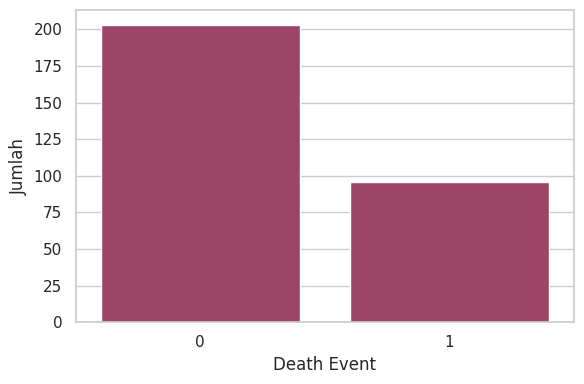

In [36]:
print(data_clean['death_event'].value_counts())

# Membuat figure
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=data_clean, x='death_event', color="#ac3664")
plt.xlabel('Death Event', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [37]:
# Memisahkan fitur (X) dan target (y) dalam dataset
X = data_clean.drop("death_event", axis = 1)
y = data_clean["death_event"]

In [38]:
# karena jumlah kelas target tidak seimbang, kita akan melakukan resampling
smote = SMOTE(random_state=42) # Inisialisasi SMOTE
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y) # Mengaplikasikan oversampling pada dataset

In [39]:
# proses resampling
# Menggabungkan data fitur dan target yang telah di-resample (misal data_fitur dan y_smote_resampled)
# Asumsi data_fitur adalah fitur-fitur kamu (X) dan y_smote_resampled adalah target hasil SMOTE

# Data fitur asli (misalnya X) dan target asli (y)
X = data_clean.drop('death_event', axis=1)  # Contoh data fitur tanpa kolom target
y = data_clean['death_event']  # Kolom target asli

# Data fitur setelah resampling (misalnya X_smote) dan target setelah resampling (y_smote_resampled)
X_smote = X  # Setelah resampling, data fitur tetap sama
y_smote_resampled = y_smote_resampled  # Target hasil SMOTE

# Menggabungkan fitur dan target setelah SMOTE
data_smote = pd.DataFrame(X_smote)
data_smote['death_event'] = y_smote_resampled

# Menampilkan hasil dataset yang sudah digabungkan
print(data_smote.head())


    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1  75.0        0                     582.0         0               20.0   
2  55.0        0                    7861.0         0               38.0   
3  65.0        0                     146.0         0               20.0   
4  50.0        1                     111.0         0               20.0   
5  65.0        1                     160.0         1               35.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
1                    1  265000.00               1.9           130    1   
2                    0  263358.03               1.1           136    1   
3                    0  162000.00               1.3           129    1   
4                    0  210000.00               1.9           137    1   
5                    0  327000.00               2.7           116    0   

   smoking  time  death_event  
1      0.0     4            1  
2      0.0     6            1  
3      1

In [40]:
# Menggabungkan Datasets hasil resampling
data_smote = pd.concat([X_smote, y_smote_resampled], axis=1)


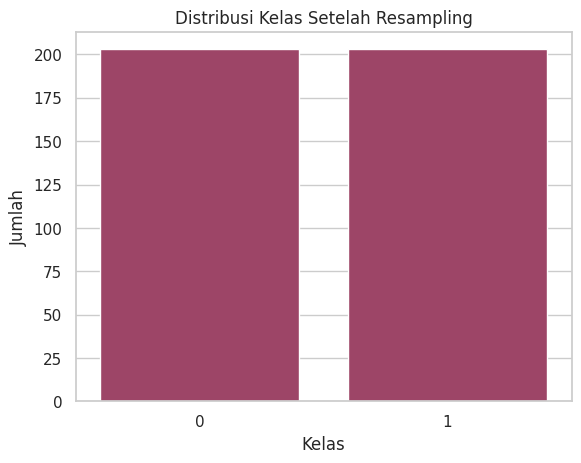

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengganti 'y_smote_resampled' dengan nama kolom target setelah resampling
sns.countplot(x=y_smote_resampled, color="#ac3664")
plt.title('Distribusi Kelas Setelah Resampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.show()


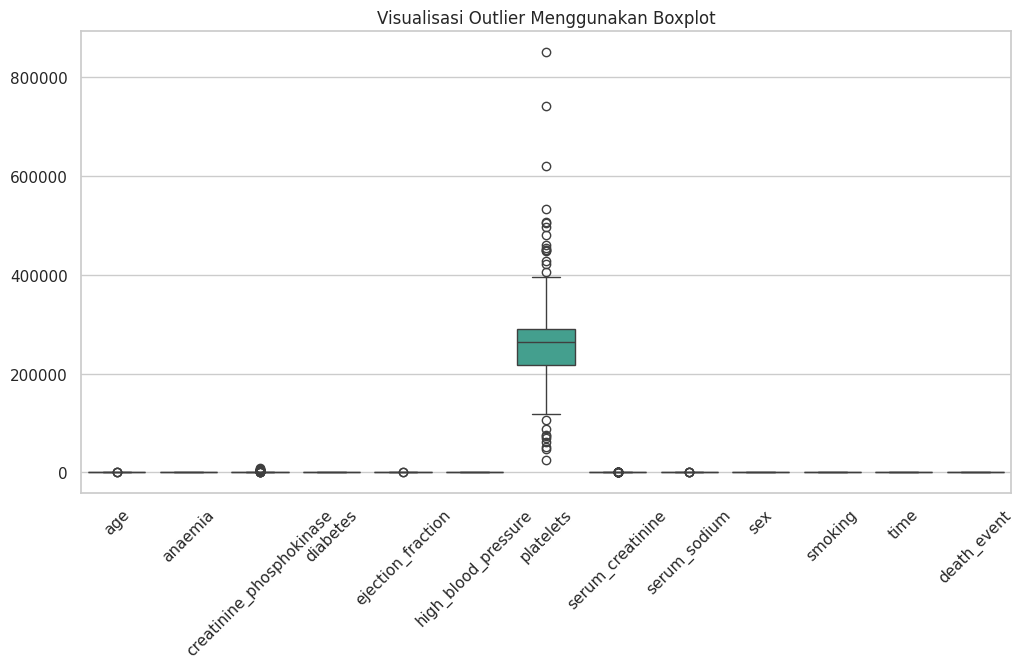

In [42]:
# cek outlier dengan visualisasi (misalnya menggunakan boxplot)
# Menggunakan seaborn untuk membuat boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data_smote)  # Gantilah `data smote  dengan nama dataframe Anda
plt.title('Visualisasi Outlier Menggunakan Boxplot')
plt.xticks(rotation=45)
plt.show()

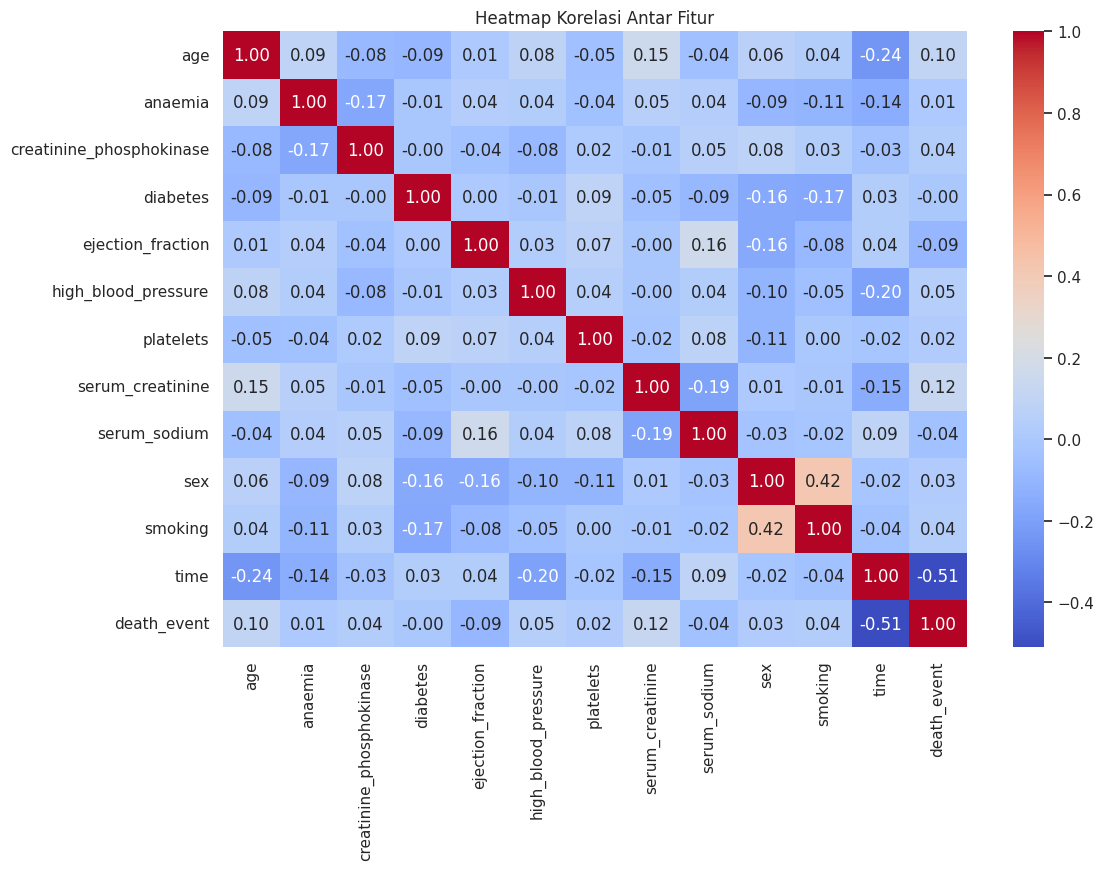

In [43]:
# melihat korelasi antar fitur (heatmap)

# Menghitung matriks korelasi
correlation_matrix = data_smote.corr()  # Gantilah `df_smote` dengan nama dataframe Anda

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


In [44]:
data_smote.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
age,1.000000,0.086445,-0.080214,-0.094420,0.008044,0.081227,-0.046638,0.153656,-0.044654,0.063103,0.037903,-0.240906,0.101526
anaemia,0.086445,1.000000,-0.169246,-0.012729,0.041361,0.038182,-0.044325,0.052174,0.041882,-0.094769,-0.109260,-0.141414,0.008417
creatinine_phosphokinase,-0.080214,-0.169246,1.000000,-0.004029,-0.041047,-0.081165,0.020483,-0.007807,0.054369,0.077888,0.032469,-0.034558,0.035235
diabetes,-0.094420,-0.012729,-0.004029,1.000000,0.004530,-0.012732,0.087987,-0.046975,-0.089551,-0.157730,-0.166203,0.033726,-0.001943
ejection_fraction,0.008044,0.041361,-0.041047,0.004530,1.000000,0.027831,0.070575,-0.004103,0.163589,-0.158938,-0.079984,0.038029,-0.094386
high_blood_pressure,0.081227,0.038182,-0.081165,-0.012732,0.027831,1.000000,0.044137,-0.004935,0.037109,-0.104615,-0.049867,-0.196439,0.049337
platelets,-0.046638,-0.044325,0.020483,0.087987,0.070575,0.044137,1.000000,-0.017536,0.077681,-0.105185,0.001355,-0.020007,0.022812
serum_creatinine,0.153656,0.052174,-0.007807,-0.046975,-0.004103,-0.004935,-0.017536,1.000000,-0.189095,0.006970,-0.010590,-0.149315,0.121363
serum_sodium,-0.044654,0.041882,0.054369,-0.089551,0.163589,0.037109,0.077681,-0.189095,1.000000,-0.027566,-0.017705,0.087640,-0.039093
sex,0.063103,-0.094769,0.077888,-0.157730,-0.158938,-0.104615,-0.105185,0.006970,-0.027566,1.000000,0.417642,-0.015608,0.025697


In [45]:
# ambil hanya 2 fitur serum_creatinine dan ejection_fraction
df_2_fitur = data_smote[['serum_creatinine','ejection_fraction', 'death_event']]
df_2_fitur.head()

,serum_creatinine,ejection_fraction,death_event
1,1.9,20.0,1
2,1.1,38.0,1
3,1.3,20.0,1
4,1.9,20.0,1
5,2.7,35.0,1


In [46]:
# ambil semua fitur
df_all_fitur = data_smote[['age', 'anaemia', 'creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking','time','death_event']]
df_all_fitur.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
1,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1
2,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1
3,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1
4,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1
5,65.0,1.0,160.0,1.0,35.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1


## 7. Menentukan label data


  - `X_2_fitur` = Untuk menampung dataset yang akan dimodelkan menggunakan hanya 2 kolom utama.
  - `y_2_fitur` = Untuk menampung target / kelas yang akan diprediksi pada model dengan 2 kolom utama.
  - `X_2_train`,`X_2_test`, `y_2_train`, `y_2_test` = untuk menampung data yang dihasilkan `train_test_split` menggunakan `X_2_fitur` dan `y_2_fitur`

  - `X_all_fitur` = Untuk menampung semua dataset yang akan dimodelkan menggunakan.
  - `y_all_fitur` = Untuk menampung target / kelas yang akan diprediksi pada model dengan semua dataset.
  - `X_all_train`,`X_all_test`, `y_all_train`, `y_all_test` = untuk menampung data yang dihasilkan `train_test_split` menggunakan `X_all_fitur` dan `y_all_fitur`


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [48]:
# Memisahkan fitur dan target dataset 2 fitur
X_2_fitur = df_2_fitur.drop('death_event', axis=1)
y_2_fitur = df_2_fitur['death_event']

In [49]:
# Memisahkan fitur dan target dataset all fitur
X_all_fitur = df_all_fitur.drop('death_event', axis=1)
y_all_fitur = df_all_fitur['death_event']

In [50]:
# from sklearn.preprocessing import MinMaxScaler

# # Membuat objek scaler
# scaler = MinMaxScaler()

# # Melakukan normalisasi pada fitur
# X_2_fitur_normalized = scaler.fit_transform(X_2_fitur)

In [51]:

# Membuat objek scaler
robust_scaler = RobustScaler()

# Melakukan scaling pada fitur
X_2_fitur = robust_scaler.fit_transform(X_2_fitur)

In [52]:
# Membuat objek scaler
robust_scaler = RobustScaler()

# Melakukan scaling pada fitur
X_all_fitur = robust_scaler.fit_transform(X_all_fitur)

In [53]:
# Splitting data untuk dataset yang hanya menggunakan 2 fitur
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2_fitur, y_2_fitur, test_size=0.2, random_state=42)
X_2_train.shape, X_2_test.shape, y_2_train.shape, y_2_test.shape

((324, 2), (82, 2), (324,), (82,))

In [54]:
# Splitting data untuk dataset yang menggunakan semua fitur
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all_fitur, y_all_fitur, test_size=0.2, random_state=42)
X_all_train.shape, X_all_test.shape, y_all_train.shape, y_all_test.shape

((324, 12), (82, 12), (324,), (82,))

## 8. Pemodelan

In [55]:
# Import Library
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [56]:
# Inisialisasi model untuk 2 fitur
rf_model_2_fitur = RandomForestClassifier(random_state=42)
knn_model_2_fitur = KNeighborsClassifier(n_neighbors=5)  # n_neighbors bisa disesuaikan
lr_model_2_fitur = LogisticRegression(random_state=42)

# Inisialisasi model untuk semua fitur
rf_model_all_fitur = RandomForestClassifier(random_state=42)
knn_model_all_fitur = KNeighborsClassifier(n_neighbors=5)  # n_neighbors bisa disesuaikan
lr_model_all_fitur = LogisticRegression(random_state=42)


### Random Forest

Random Forest Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        44
           1       0.81      0.76      0.78        38

    accuracy                           0.80        82
   macro avg       0.80      0.80      0.80        82
weighted avg       0.80      0.80      0.80        82



<Axes: >

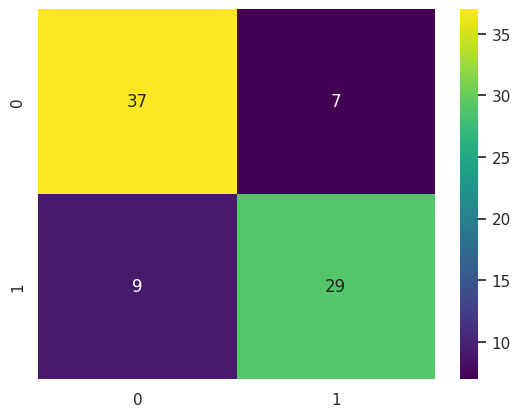

In [57]:
rf_model_2_fitur.fit(X_2_train, y_2_train)
y_rf_pred_2_fitur = rf_model_2_fitur.predict(X_2_test)

# confusion matrix dan classification report
print("Random Forest Classifier 2 fitur")
print(classification_report(y_2_test, y_rf_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_rf_pred_2_fitur), annot=True, cmap='viridis')


Random Forest Classifier all fitur
              precision    recall  f1-score   support

           0       0.87      0.89      0.88        44
           1       0.86      0.84      0.85        38

    accuracy                           0.87        82
   macro avg       0.87      0.86      0.86        82
weighted avg       0.87      0.87      0.87        82



<Axes: >

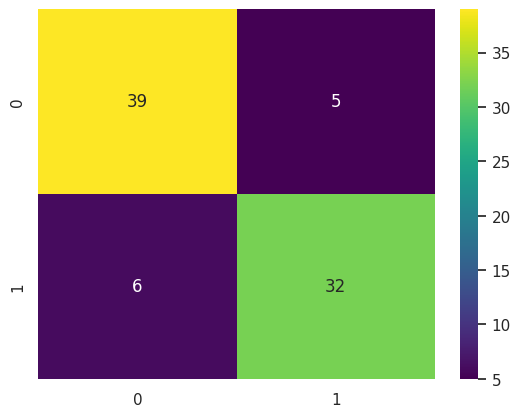

In [58]:
rf_model_all_fitur.fit(X_all_train, y_all_train)
y_rf_pred_all_fitur = rf_model_all_fitur.predict(X_all_test)

# confusion matrix dan classification report
print("Random Forest Classifier all fitur")
print(classification_report(y_all_test, y_rf_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_rf_pred_all_fitur), annot=True, cmap='viridis')

### KNN

KNN Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        44
           1       0.87      0.68      0.76        38

    accuracy                           0.80        82
   macro avg       0.82      0.80      0.80        82
weighted avg       0.81      0.80      0.80        82



<Axes: >

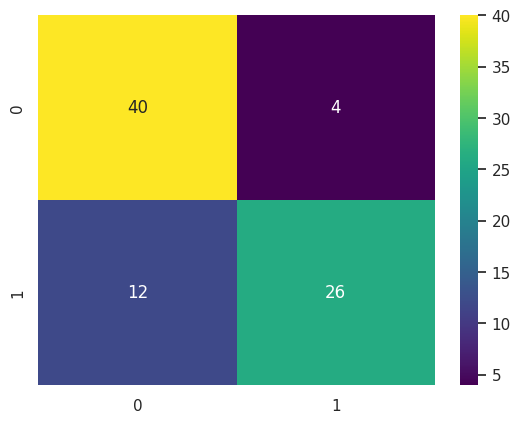

In [59]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputasi dengan strategi 'mean' (atau 'median' jika lebih tepat untuk data)
imputer = SimpleImputer(strategy='mean')

# imputasi pada X_2_train dan X_2_test
X_2_train_imputed = imputer.fit_transform(X_2_train)
X_2_test_imputed = imputer.transform(X_2_test)

# Latih model KNN setelah imputasi
knn_model_2_fitur.fit(X_2_train_imputed, y_2_train)
y_knn_pred_2_fitur = knn_model_2_fitur.predict(X_2_test_imputed)

# klasifikasi dan confusion matrix
print("KNN Classifier 2 fitur")
print(classification_report(y_2_test, y_knn_pred_2_fitur))
sns.heatmap(confusion_matrix(y_2_test, y_knn_pred_2_fitur), annot=True, cmap='viridis')


KNN Classifier all fitur
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        44
           1       0.81      0.68      0.74        38

    accuracy                           0.78        82
   macro avg       0.79      0.77      0.78        82
weighted avg       0.78      0.78      0.78        82



<Axes: >

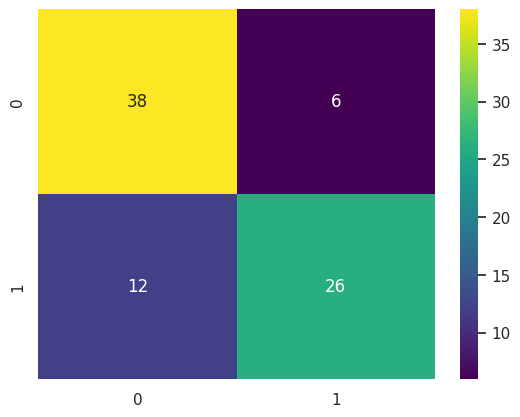

In [60]:
from sklearn.impute import SimpleImputer

# Inisialisasi imputasi dengan strategi 'mean' (atau 'median' jika lebih tepat untuk data)
imputer = SimpleImputer(strategy='mean')

# imputasi pada X_2_train dan X_2_test
X_all_train_imputed = imputer.fit_transform(X_all_train)
X_all_test_imputed = imputer.transform(X_all_test)

# Latih model KNN setelah imputasi
knn_model_all_fitur.fit(X_all_train_imputed, y_all_train)
y_knn_pred_all_fitur = knn_model_all_fitur.predict(X_all_test_imputed)

# klasifikasi dan confusion matrix
print("KNN Classifier all fitur")
print(classification_report(y_all_test, y_knn_pred_all_fitur))
sns.heatmap(confusion_matrix(y_all_test, y_knn_pred_all_fitur), annot=True, cmap='viridis')


### Logistic Regression

LR Classifier 2 fitur
              precision    recall  f1-score   support

           0       0.81      0.50      0.62        44
           1       0.60      0.87      0.71        38

    accuracy                           0.67        82
   macro avg       0.71      0.68      0.66        82
weighted avg       0.72      0.67      0.66        82



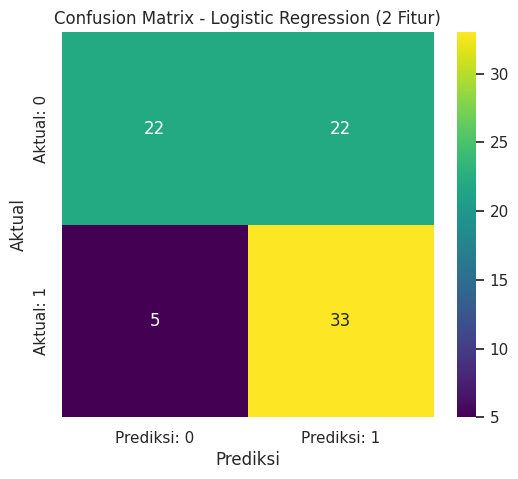

In [61]:
# Inisialisasi imputasi dengan strategi 'mean' (atau 'median' jika lebih tepat untuk data)
imputer = SimpleImputer(strategy='mean')

# Imputasi pada dataset X_2_train dan X_2_test
X_2_train_imputed = imputer.fit_transform(X_2_train)
X_2_test_imputed = imputer.transform(X_2_test)

# Inisialisasi model Logistic Regression
lr_model_2_fitur = LogisticRegression(random_state=42)

# Melatih model Logistic Regression dengan data yang sudah diimputasi
lr_model_2_fitur.fit(X_2_train_imputed, y_2_train)

# Prediksi dengan model Logistic Regression
y_lr_pred_2_fitur = lr_model_2_fitur.predict(X_2_test_imputed)

# Menampilkan Classification Report
print("LR Classifier 2 fitur")
print(classification_report(y_2_test, y_lr_pred_2_fitur))

# Menampilkan Confusion Matrix
conf_matrix_lr = confusion_matrix(y_2_test, y_lr_pred_2_fitur)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
plt.title("Confusion Matrix - Logistic Regression (2 Fitur)")
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()


LR Classifier all fitur
              precision    recall  f1-score   support

           0       0.81      0.50      0.62        44
           1       0.60      0.87      0.71        38

    accuracy                           0.67        82
   macro avg       0.71      0.68      0.66        82
weighted avg       0.72      0.67      0.66        82



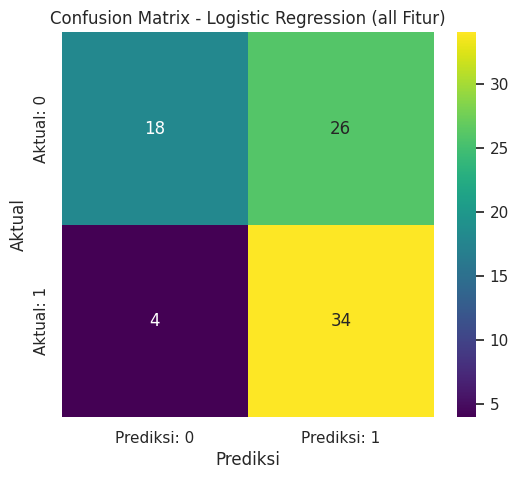

In [62]:
# Inisialisasi imputasi dengan strategi 'mean' (atau 'median' jika lebih tepat untuk data)
imputer = SimpleImputer(strategy='mean')

# Imputasi pada dataset X_2_train dan X_2_test
X_all_train_imputed = imputer.fit_transform(X_all_train)
X_all_test_imputed = imputer.transform(X_all_test)

# Inisialisasi model Logistic Regression
lr_model_all_fitur = LogisticRegression(random_state=42)

# Melatih model Logistic Regression dengan data yang sudah diimputasi
lr_model_all_fitur.fit(X_all_train_imputed, y_all_train)

# Prediksi dengan model Logistic Regression
y_lr_pred_all_fitur = lr_model_all_fitur.predict(X_all_test_imputed)

# Menampilkan Classification Report
print("LR Classifier all fitur")
print(classification_report(y_2_test, y_lr_pred_2_fitur))

# Menampilkan Confusion Matrix
conf_matrix_lr = confusion_matrix(y_all_test, y_lr_pred_all_fitur)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='viridis', xticklabels=['Prediksi: 0', 'Prediksi: 1'], yticklabels=['Aktual: 0', 'Aktual: 1'])
plt.title("Confusion Matrix - Logistic Regression (all Fitur)")
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()


- Dari pekerjaan Membangun Model yang telah anda lakukan, bagaimana cara Anda meningkatkan hasil akurasi pada sebuah model? : melakukan normalisasi

## 9. Evaluasi hasil pemodelan

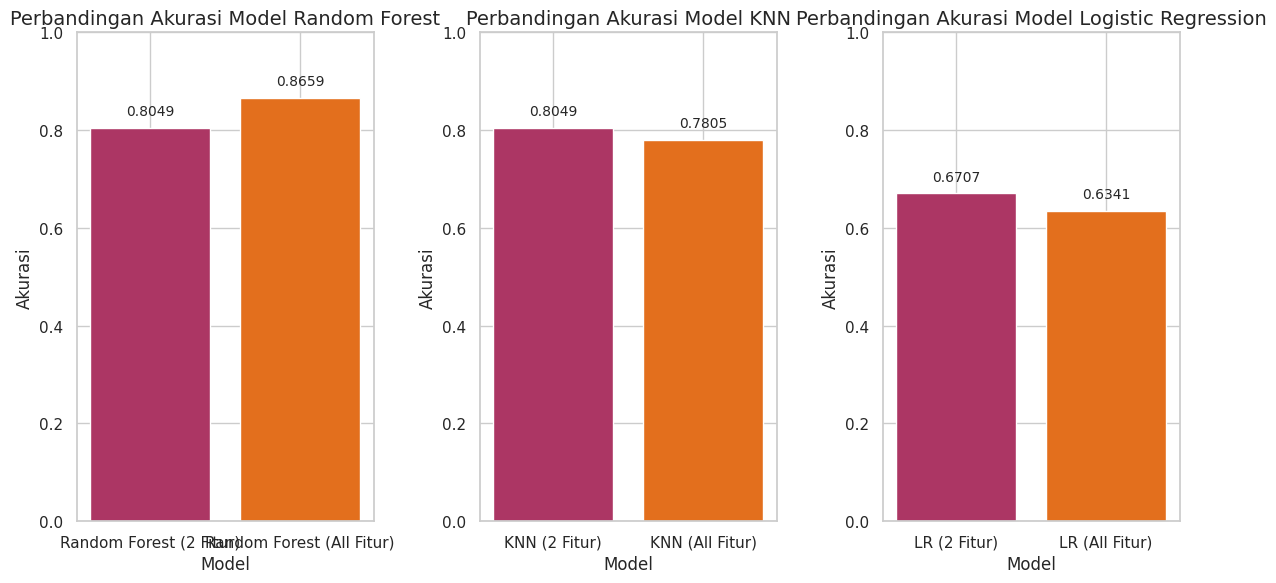

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Menghitung akurasi untuk Random Forest
accuracy_rf_2_fitur = accuracy_score(y_2_test, y_rf_pred_2_fitur)
accuracy_rf_all_fitur = accuracy_score(y_all_test, y_rf_pred_all_fitur)

# Menghitung akurasi untuk KNN
accuracy_knn_2_fitur = accuracy_score(y_2_test, y_knn_pred_2_fitur)
accuracy_knn_all_fitur = accuracy_score(y_all_test, y_knn_pred_all_fitur)

# Menghitung akurasi untuk Logistic Regression
accuracy_lr_2_fitur = accuracy_score(y_2_test, y_lr_pred_2_fitur)
accuracy_lr_all_fitur = accuracy_score(y_all_test, y_lr_pred_all_fitur)

# Membuat subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Define warna tone pink muda
colors = ['#ac3664', '#e36f1d']  # Light Pink and Hot Pink

# Visualisasi untuk Random Forest
rf_accuracies = [accuracy_rf_2_fitur, accuracy_rf_all_fitur]
rf_models = ['Random Forest (2 Fitur)', 'Random Forest (All Fitur)']
rf_bars = axs[0].bar(rf_models, rf_accuracies, color=colors)
axs[0].set_xlabel('Model', fontsize=12)
axs[0].set_ylabel('Akurasi', fontsize=12)
axs[0].set_title('Perbandingan Akurasi Model Random Forest', fontsize=14)
axs[0].set_ylim(0, 1)
for bar in rf_bars:
    yval = bar.get_height()
    axs[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Visualisasi untuk KNN
knn_accuracies = [accuracy_knn_2_fitur, accuracy_knn_all_fitur]
knn_models = ['KNN (2 Fitur)', 'KNN (All Fitur)']
knn_bars = axs[1].bar(knn_models, knn_accuracies, color=colors)
axs[1].set_xlabel('Model', fontsize=12)
axs[1].set_ylabel('Akurasi', fontsize=12)
axs[1].set_title('Perbandingan Akurasi Model KNN', fontsize=14)
axs[1].set_ylim(0, 1)
for bar in knn_bars:
    yval = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Visualisasi untuk Logistic Regression
lr_accuracies = [accuracy_lr_2_fitur, accuracy_lr_all_fitur]
lr_models = ['LR (2 Fitur)', 'LR (All Fitur)']
lr_bars = axs[2].bar(lr_models, lr_accuracies, color=colors)
axs[2].set_xlabel('Model', fontsize=12)
axs[2].set_ylabel('Akurasi', fontsize=12)
axs[2].set_title('Perbandingan Akurasi Model Logistic Regression', fontsize=14)
axs[2].set_ylim(0, 1)
for bar in lr_bars:
    yval = bar.get_height()
    axs[2].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()



  * Untuk model random forest akurasi lebih tinggi dengan semua fitur yaitu diangka 0.8659 sedangkan yang hanya 2 fitur 0.8049
  * Untuk model KNN akurasi lebih tinggi dengan 2 fitur yaitu di angka 0.8049 sedangkan yang hanya all fitur 0.7805
  * Untuk model logistic regression akurasi lebih tinggi dengan semua fitur yaitu di angka 0.6707 sedangkan yang hanya 2 fitur 0.6341
